# Hearth Disease prediction with Logistic Regression

## Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

hd_data = pd.read_csv("./heart_2020_cleaned.csv")
hd_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [2]:
hd_data.shape

(319795, 18)

*Here we can see that there are 18 features in this dataset, with one feature being the label. The lable of the dataset is the HeartDisease feature, therefore we have 17 features and 319795 data points.*

## Visualizing the data

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64


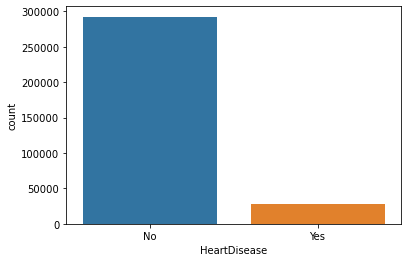

In [3]:
sns.countplot(x='HeartDisease', data=hd_data)
print(hd_data.HeartDisease.value_counts() / len(hd_data) * 100)

*From the graph above we can see that there are **91.4%** noes when it comes to heart disease and only **8.5%** yeses.*

### Demography
Here we are going to see what effects does the demography have on heart disease.

The percentages of heart disease cases based on the age category
80 or older    19.906477
70-74          17.707230
65-69          14.981916
75-79          14.791948
60-64          12.154313
55-59           8.044423
50-54           5.052424
45-49           2.718007
40-44           1.775472
35-39           1.081358
30-34           0.825631
25-29           0.485880
18-24           0.474921
Name: AgeCategory, dtype: float64


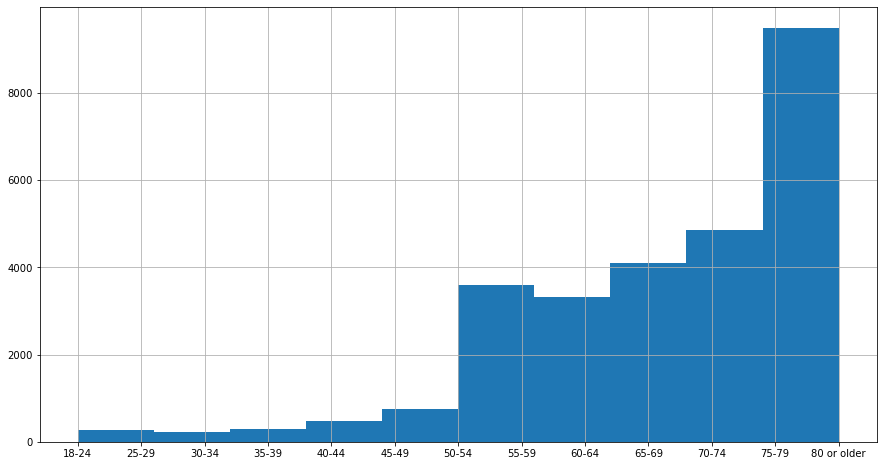

In [4]:
# Ploting the impact of age
data = hd_data[hd_data['HeartDisease'] == 'Yes'].copy()
data.sort_values("AgeCategory", inplace=True)
data.AgeCategory.hist(figsize=(15,8))
print("The percentages of heart disease cases based on the age category")
print(data.AgeCategory.value_counts() / len(data) * 100)

*From the data and graph, that is displayed above we can see that age has a big impact on the whether the person has a heart disease or not.*
*Around **87.5%** of the people that have a heart disease are above 50 years old.*

      Sex  HeartDisease
0  Female      0.066947
1    Male      0.106185


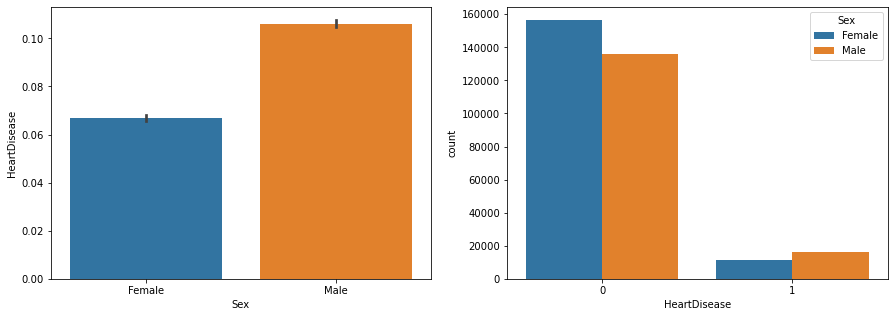

In [5]:
# Ploting the impact of sex
data = hd_data
data.HeartDisease.replace({"Yes": 1, "No": 0}, inplace=True)
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.barplot(x='Sex', y='HeartDisease', data=data, ax=axs[0])
sns.countplot(x='HeartDisease', hue='Sex', data=data, ax=axs[1])
print(data.groupby('Sex',as_index=False).HeartDisease.mean())

*We can see that in the dataset **10%** of men have a heart disease while ony **6%** of women have a heart disease. In the second graph we can se the number of people with or without a heart disease, grouped by sex. The data tells us that men are in higher risk of heart diseases then women.*

In [6]:
# function for calculating the percentage of people with heart disease based on two columns
def groupData(dataF, firstColumn, secondColumn):
    df = pd.pivot_table(dataF, index=[firstColumn, secondColumn], columns=["HeartDisease"], aggfunc='size')
    df["HeartDisease%"] = (df[1] / (df[1]+df[0])) * 100
    df = df.reset_index()
    df[f'{secondColumn}/{firstColumn}'] = df[secondColumn] + '/' + df[firstColumn]
    df = df[[f'{secondColumn}/{firstColumn}', "HeartDisease%"]]
    df.sort_values("HeartDisease%", inplace=True)
    return df

                             Race  HeartDisease
0  American Indian/Alaskan Native      0.104191
1                           Asian      0.032970
2                           Black      0.075374
3                        Hispanic      0.052576
4                           Other      0.081076
5                           White      0.091786 

HeartDisease                               Race/Sex  HeartDisease%
1                                      Asian/Female       2.236504
7                                        Asian/Male       4.284347
3                                   Hispanic/Female       4.827302
9                                     Hispanic/Male       5.744004
5                                      White/Female       6.911373
4                                      Other/Female       7.025547
2                                      Black/Female       7.257054
8                                        Black/Male       7.943626
10                                       Other/Male       9

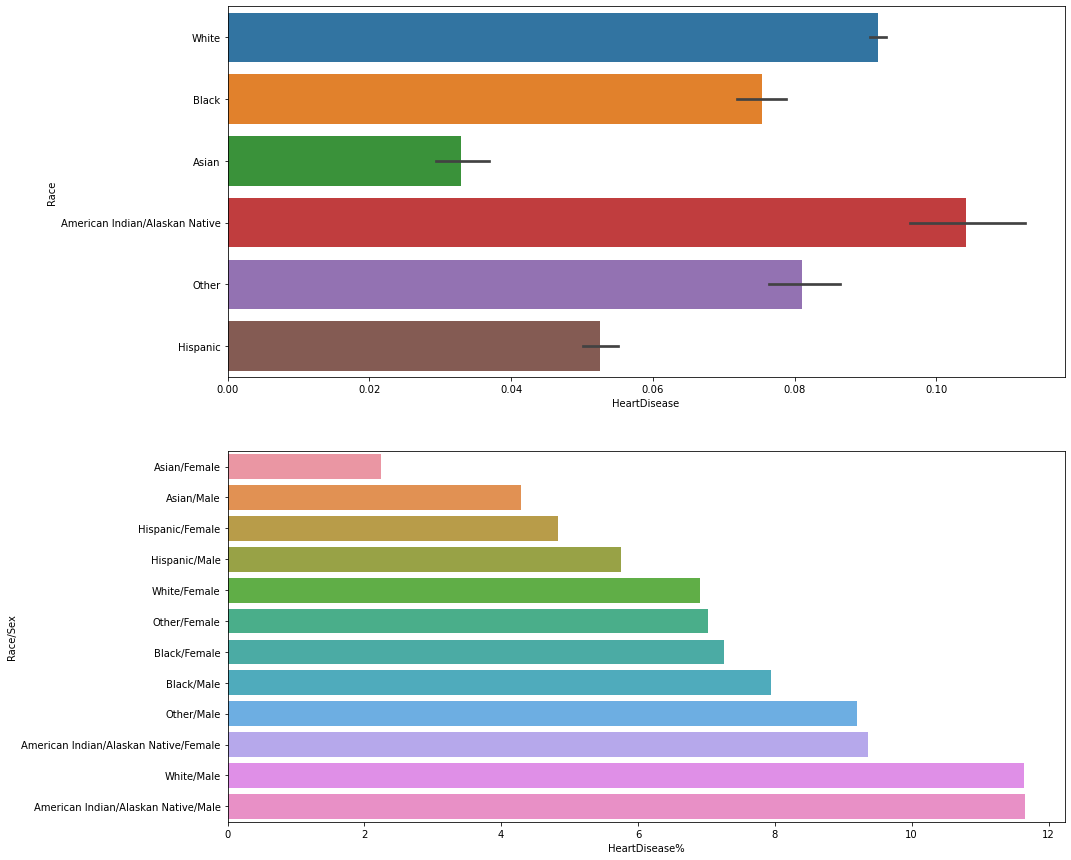

In [7]:
# ploting the impact race
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))
sns.barplot(x='HeartDisease', y='Race', data=data, ax=axs[0])
print(data.groupby('Race',as_index=False).HeartDisease.mean(), '\n')
    
# ploting the impact of sex and race when grouped
sr_data = groupData(data, 'Sex', 'Race')
sns.barplot(x='HeartDisease%', y='Race/Sex', data=sr_data, ax=axs[1])
print(sr_data, '\n')

*The grahps and the data displayed show us that the race has a big impact when it comes to heart diseases. The second graph gives us a grate showing of how for each race the men have a higher percentage than women. However, Hispanic and Asian people have a much lower percentage than others, both men and women have a smaller percentage than the other race groups. On the other end of the graph we can see that American Indian/Alaskan Native males and females have have very high percentages, a percentage that is higher than almost all other Race/Sex groups (only White males are in between).*

**Conclusion:** *The dempgraphic characteristics of a person have a big impact on the risk of heart disease.*

### Lifestyle
In the previous section we saw how does demography impact the risk, in this section we will look at the impact of the persons *lifestyle/life decisions*.

HeartDisease AlcoholDrinking/Smoking  HeartDisease%
1                             Yes/No       3.001674
0                              No/No       6.174627
3                            Yes/Yes       6.634365
2                             No/Yes      12.783034


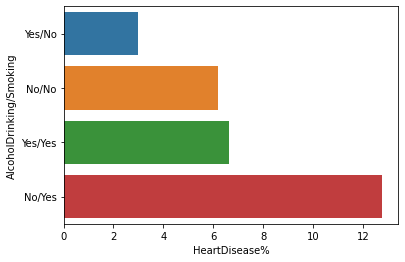

In [8]:
# ploting the impact of smoking and drinking alcohol
sa_data = groupData(data, 'Smoking', 'AlcoholDrinking')
sns.barplot(x='HeartDisease%', y='AlcoholDrinking/Smoking', data=sa_data)
print(sa_data)

*The data in the graph above shows how Drinking alcohol and smoking cigarettes impacts the risk of having a heart disease. However, the data in the dataset is, in my opinion, not well crafted. For smoking, the question to which we get and answer yes/no is "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]" and for drinking alcohol "Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week". I think that if we had more categories instead of just Yes or No, the data would make more sense.*

*However, working with data that we have we can see that smoking has a larger impact when in comes to heart disease risk. The top 2 categories with highest risk smoke cigarettes.*

HeartDisease SleepTime/PhysicalActivity  HeartDisease%
2                      Sleep over 6/Yes       6.826530
3                    Sleep under 6h/Yes       9.623806
0                       Sleep over 6/No      13.090856
1                     Sleep under 6h/No      17.809027 



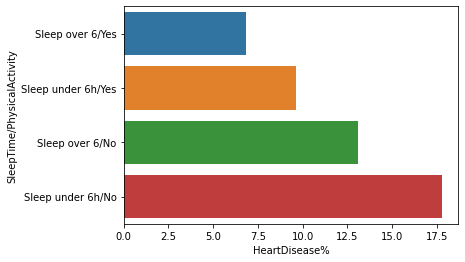

In [9]:
# categorizing the SleepTime data
data['SleepTime'] = data['SleepTime'].apply(lambda x : 'Sleep over 6' if x >= 6 else 'Sleep under 6h')

# grouping the data and ploting it
ps_data = groupData(data, 'PhysicalActivity', 'SleepTime')
sns.barplot(x='HeartDisease%', y='SleepTime/PhysicalActivity', data=ps_data)
print(ps_data, '\n')

*The graph above shows how important it is to sleep for more than 6 hours and have physical activity in your life. It is iteresting to see how much of an impact the physical activity has on the risk of having a heart disease.*

**Conclusion:** *The lifestyle of a person has a decent impact on the risk of having a heart disease. With sleep time and physical activity having a much noticable and reasonable impact.*

### Health
In this section we will see how much of an impact the health of a person has on the risk of having a heart disease.

<AxesSubplot:xlabel='HeartDisease', ylabel='Percent'>

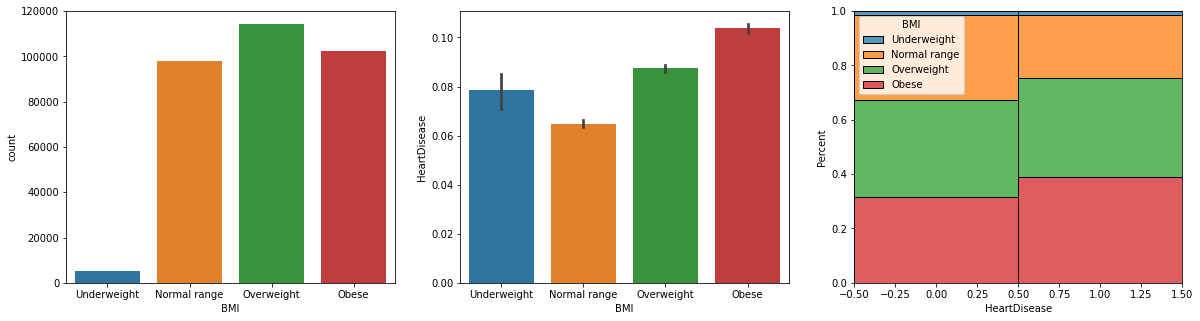

In [10]:
# ploting the impact of BMI (Body Mass Index)
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
bmi = pd.cut(x=data['BMI'], bins=[0, 18.5, 25, 30, 99], labels=['Underweight', 'Normal range', 'Overweight', 'Obese'])
sns.countplot(x=bmi, data=data, ax=axs[0])
sns.barplot(x=bmi, y='HeartDisease', data=data, ax=axs[1])
sns.histplot(
    data=data,
    x="HeartDisease",
    stat="percent",
    hue=bmi,
    multiple="fill",
    discrete=True,
    ax=axs[2]
)

*We can see from the graphs above that the BMI has a decent influence on the heart disease risk. People with normal BMI have the lowest percentage of heart disease, while people with abnormal BMI have a higher percentage, especially with a higher BMI than recommended.*

Processed data:
   Value  HeartDisease            Type  HeartDisease%
0    1.0      0.022441       GenHealth       2.244098
1    2.0      0.047261       GenHealth       4.726062
2    3.0      0.102632       GenHealth      10.263183
3    4.0      0.204285       GenHealth      20.428526
4    5.0      0.341040       GenHealth      34.103995
5    1.0      0.062985     DiffWalking       6.298455
6    5.0      0.225805     DiffWalking      22.580500
7    1.0      0.069928  PhysicalHealth       6.992786
8    2.0      0.107921  PhysicalHealth      10.792132
9    3.0      0.131101  PhysicalHealth      13.110148 



<AxesSubplot:xlabel='Value', ylabel='HeartDisease%'>

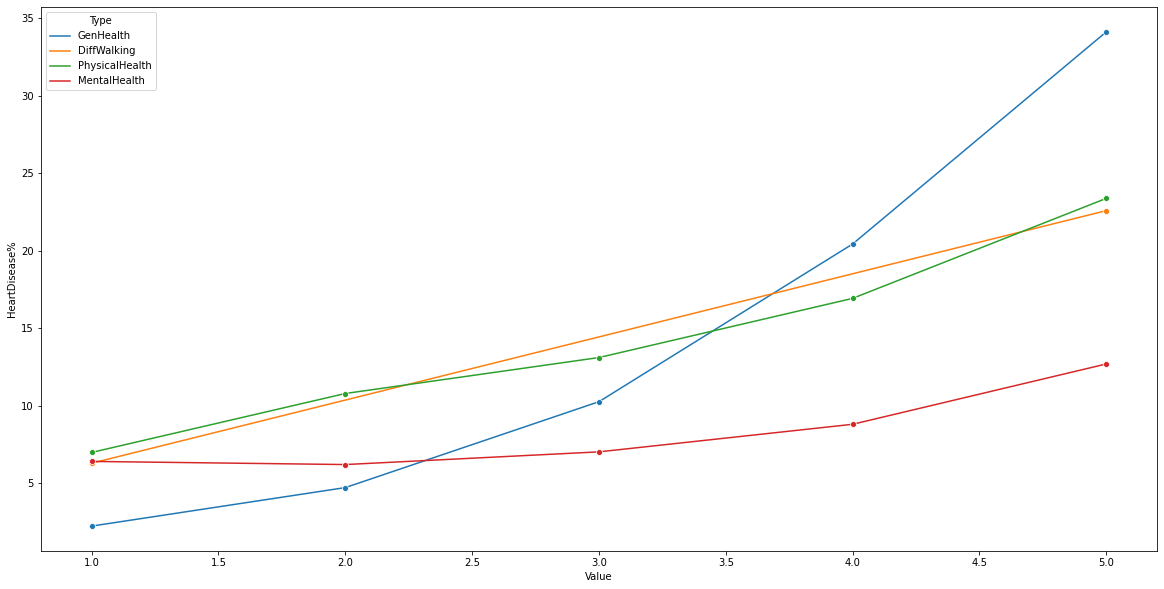

In [11]:
# making the data numerical
data["GenHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)
data["DiffWalking"].replace({"Yes": 5, "No": 1}, inplace=True)
data['PhysicalHealth'] = pd.cut(x=data['PhysicalHealth'], bins=[0, 2, 5, 10, 20, 30], labels=['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
data['MentalHealth'] = pd.cut(x=data['MentalHealth'], bins=[0, 2, 5, 10, 20, 30], labels=['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
data["PhysicalHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)
data["MentalHealth"].replace({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5}, inplace=True)

# grouping the data and calucating the mean
ghData = data.groupby('GenHealth',as_index=False).HeartDisease.mean()
ghData['Type'] = 'GenHealth'
ghData['Value'] = ghData['GenHealth']
ghData.drop(['GenHealth'], axis=1, inplace=True)

dwData = data.groupby('DiffWalking',as_index=False).HeartDisease.mean()
dwData['Type'] = 'DiffWalking'
dwData['Value'] = dwData['DiffWalking']
dwData.drop(['DiffWalking'], axis=1, inplace=True)

phData = data.groupby('PhysicalHealth',as_index=False).HeartDisease.mean()
phData['Type'] = 'PhysicalHealth'
phData['Value'] = phData['PhysicalHealth']
phData.drop(['PhysicalHealth'], axis=1, inplace=True)

mhData = data.groupby('MentalHealth',as_index=False).HeartDisease.mean()
mhData['Type'] = 'MentalHealth'
mhData['Value'] = mhData['MentalHealth']
mhData.drop(['MentalHealth'], axis=1, inplace=True)

# appending the data to one data frame to plot it with hue using seaborn
h_df = pd.DataFrame({"Value":[], "HeartDisease": [], "Type": []})
h_df = h_df.append(ghData, ignore_index=True)
h_df = h_df.append(dwData, ignore_index=True)
h_df = h_df.append(phData, ignore_index=True)
h_df = h_df.append(mhData, ignore_index=True)
h_df['HeartDisease%'] = h_df['HeartDisease'] * 100
print("Processed data:")
print(h_df.head(10), "\n")

# ploting the data
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Value', y='HeartDisease%', hue='Type', marker="o", ax=ax, data=h_df)

*In the code above I calculated the mean of the health disease values for each health related feature and multiplied that value by 100. By doing this, I now have a percentage of people that have a heart disease based on the value of that health related feature. The data was preprocessed in a way that 1 is the best value and 5 is the worst. As we can see from the graph, for each feature as the values get worst the percentage of having a heart disease grows. General healty however has the bigest impact on the percentage as the values get worst.* 

### Disease
In this section we will see how much of an impact do other diseases have on the risk of having a heart disease.